In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')
%matplotlib inline

In [32]:
# Define ODE
#f = lambda t, s: np.exp(-t) 
f = lambda t, s: 4/(1+s**2)

In [37]:
# Define parameters 
h = 0.5 # Step size
t = np.arange(0, 4+h, h) # Numerical grid
s0 = 0 # Initial Condition

In [38]:
# Numerically integrate ODE with off-the-shelf command
sol = solve_ivp(f, t, [s0], method='DOP853', dense_output=True)
z = sol.sol(t)

In [39]:
# Improved Euler method
s = np.zeros(len(t))
u = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    u[i + 1] = s[i] + h*f(t[i], s[i])
    s[i + 1] = s[i] + h*( f(t[i], s[i]) + f(t[i + 1], u[i + 1]))/2

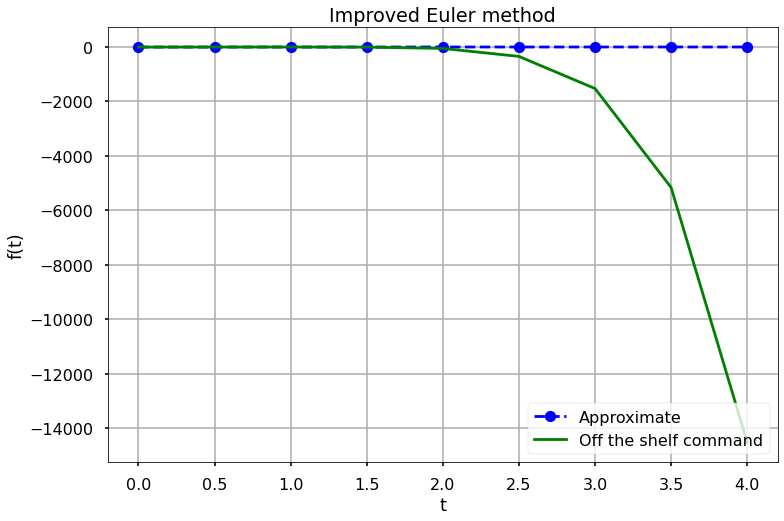

In [40]:
# Plot the results
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, z.T, 'g', label='Off the shelf command')
plt.title('Improved Euler method')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()